In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Minimax on a convex/concave function

We define the loss functions $L(x,y)$ below, together with $F(x,y) = [\nabla L_x, -\nabla L_y]$

Define $z = [x,y]$ where $x, y \in \mathbb{R}^n$, so that $z \in \mathbb{R}^{2n}$ and $A \in \mathbb{R}^{n\times n}$

x²-y²:

In [113]:
# z = (x,y)
def L(z):
    return z[0]**2 - z[1]**2

def F(z):
    return np.array([2*z[0], 2*z[1]])

0.5x² + 2xy - 0.5y²

In [1]:
# z = 0.5x² +2xy -0.5y²
def L(z):
    return 0.5*z[0]**2 +2*z[0]*z[1] - 0.5*z[1]**2

def F(z):
    return np.array([z[0]+2*z[1], -2*z[0]+z[1]])

0.5x² + xy - 0.5y²

In [108]:
# z = 0.5x² +xy -0.5y²
def L(z):
    return 0.5*z[0]**2 +z[0]*z[1] - 0.5*z[1]**2

def F(z):
    return np.array([z[0]+z[1], -z[0]+z[1]])

0.5x² + 3xy - 0.5y²

In [5]:
# z = 0.5x² +3xy -0.5y²
def L(z):
    return 0.5*z[0]**2 +3*z[0]*z[1] - 0.5*z[1]**2

def F(z):
    return np.array([z[0]+3*z[1], -3*z[0]+z[1]])

0.5x² + 4xy - 0.5y²

In [6]:
# z = 0.5x² +4xy -0.5y²
def L(z):
    return 0.5*z[0]**2 +4*z[0]*z[1] - 0.5*z[1]**2

def F(z):
    return np.array([z[0]+4*z[1], -4*z[0]+z[1]])

exp(x) - exp(y) + exp(-x) - exp(-y)

In [116]:
# exp
def L(z):
    return np.float64(math.exp(z[0]) - math.exp(z[1]) + math.exp(-z[0]) - math.exp(-z[1]))

def F(z):
    return np.array([np.float64(math.exp(z[0]) - math.exp(-z[0])) , np.float64(  math.exp(z[1]) - math.exp(-z[1]))])

-cos(x) + cos(y)

In [119]:
def L(z):
    return -math.cos(z[0]) + math.cos(z[1])

def F(z):
    return np.array([ math.sin(z[0]) , math.sin(z[1]) ])

Function to display the graph:

In [3]:
def plot_trajectory(points, update_directions, max_iters, title, nb_arrows = 10, line_color = 'b'):
    """Plot the trajectory in the x-y plane of a DTA. 
        INPUT:
            points: list of np.array, each corresponding to one point at one iteration
            grads : list of np.array, each corresponding to the direction to the next iterate"""
            
    xs = [z[0] for z in points]
    ys = [z[1] for z in points]
    plt.rcParams["figure.figsize"] = (8,8)
    plt.scatter(xs[0], ys[0], color = 'r', lw = 3, label = "Starting point")
    plt.scatter(0, 0, color = 'k', lw = 2, label = "Minimum point", marker='*')
    plt.plot(xs, ys, color = line_color, label = 'Trajectory')

    # Add gradient arrows
    scale = 0.2
    x_grads = [z[0] for z in update_directions]
    y_grads = [z[1] for z in update_directions]
    for i in range(0, max_iters, int(max_iters/nb_arrows)):
        plt.arrow(xs[i], ys[i], scale*x_grads[i], scale*y_grads[i], lw = 1.5, head_width = 0.05, color = line_color)

    ax_lim = 4
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)
    plt.legend(loc = 'upper right')
    if title is not None:
        plt.suptitle(title) 

# GDA

$ z' = z - sF(z)$

In [4]:
def GDA(z0, gamma, max_iters, plot = True):
    """Gradient Descent Ascent algorithm"""
    points = []
    update_directions = []

    z = np.copy(z0)
    #timer = time.time()
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Compute update direction
        update_direction = -F(z)
        update_directions.append(np.copy(update_direction))

        # Update z with the algorithm
        z += gamma * update_direction
    print(points[len(points)-1])
    if plot:
        plot_trajectory(points, update_directions, max_iters, title = 'GDA trajectory for L(x,y) = xy', line_color='b')

    return points, update_directions

[-0.00011381  0.00043918]


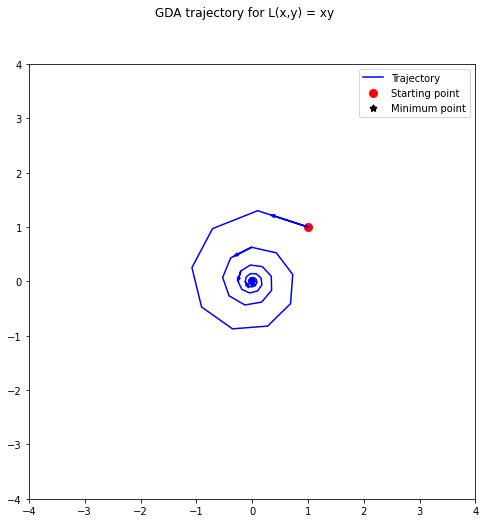

In [5]:
z0 = np.array([1.0,1.0])
gamma = 0.3
max_iters = 100

points, update_directions = GDA(z0, gamma, max_iters)

# EGM

$z' = z_t - sF(z_t), z_t = z - sF(z)$

In [6]:
def EGM(z0, gamma, max_iters, plot = True):
    """Extra Gradient Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    z_t = np.copy(z0)
    
    #timer = time.time()
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update intermediary point
        grad_z = F(z)
        z_t = z - gamma*grad_z

        # Update next point
        update_direction = -F(z_t)
        z += gamma*update_direction

        update_directions.append(np.copy(update_direction))
    print(points[len(points)-1]) 

    if plot:
        plot_trajectory(points, update_directions, max_iters, 'EGM trajectory for L(x,y) = xy', nb_arrows = 15, line_color='g')

    return points, update_directions

[7.50249997e-31 9.81063546e-31]


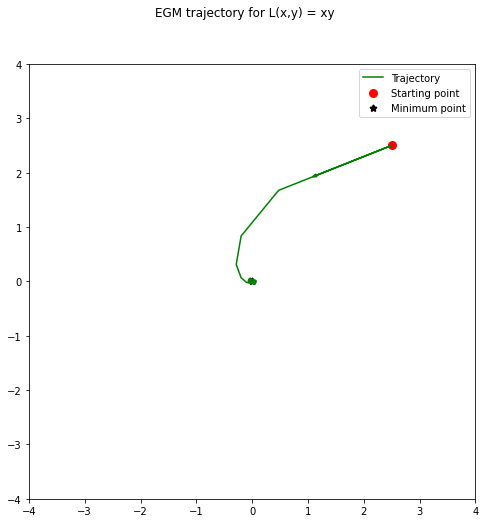

In [7]:
z0 = np.array([2.5,2.5])
gamma = 0.3
max_iters = 100

points, update_directions = EGM(z0, gamma, max_iters)

# OGDA

$z'' = z' - 2sF(z') + sF(z)$

In [8]:
def OGDA(z0, gamma, max_iters, plot = True):
    """Optimistic Gradient Descent Ascent Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    
    # First iteration
    points.append(np.copy(z))
    # Compute update direction
    update_direction = -F(z)
    update_directions.append(np.copy(update_direction))

    # Update z with the algorithm
    z += gamma * update_direction

    # Rest of the iterations
    for n_iter in range(1,max_iters):
        points.append(np.copy(z))
        # Update next iterate point
        grad_z = F(z)
        grad_z_minus_1 = F(points[n_iter - 1])

        update_direction = -2 * grad_z + grad_z_minus_1
        update_directions.append(update_direction)

        z += gamma*update_direction
    
    if plot:
        plot_trajectory(points, update_directions, max_iters, 'OGDA trajectory for L(x,y) = xy', nb_arrows = 15, line_color='orange')

    return points, update_directions

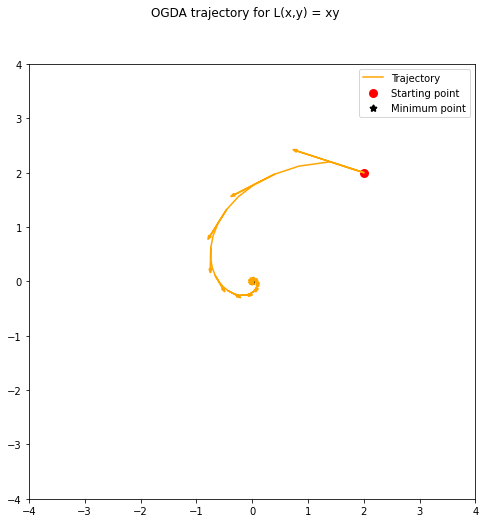

In [9]:
z0 = np.array([2.,2.])
gamma = 0.1
max_iters = 50

points, update_directions = OGDA(z0, gamma, max_iters)

# Jacobian Method 
$z' = z + s\nabla F(z) F(z)$

In [10]:
def Grad_F(z):
    return np.array([[1, 2],[-2, 1]])

In [115]:
def Grad_F(z):
    return np.array([[np.float64(math.exp(z[0]) + math.exp(-z[0])), 0.],[0.,np.float64(math.exp(z[1])+math.exp(-z[1]))]])

In [118]:
def Grad_F(z):
    return np.array([[-math.cos(z[0]), 0.],[0.,-math.cos(z[0])]])

In [11]:
def JM(z0, gamma, max_iters, plot = True):
    """Jacobian Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update next iterate point
        grad_z = F(z)
        grad_F = Grad_F(z)

        update_direction = grad_F @ grad_z
        
        update_directions.append(update_direction)

        z += gamma*update_direction
    print(points[len(points)-1])
    if plot:
        plot_trajectory(points, update_directions, max_iters, 'JM trajectory for L(x,y) = xy', nb_arrows = 2, line_color='yellow')

    return points, update_directions

[-9.55851681e-06 -2.04424497e-05]


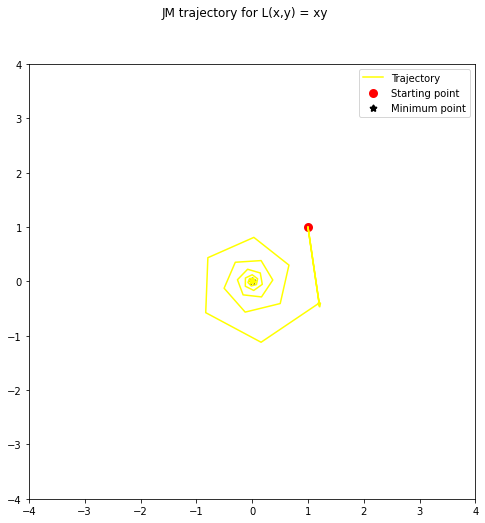

In [14]:
z0 = np.array([1.0,1.0])
gamma = 0.2
max_iters = 100

points, update_directions = JM(z0, gamma, max_iters)

# Ploting all methods

In [15]:
def compare_all_methods(z0, gamma, max_iters):
    z_gda, updts_gda = GDA(z0, gamma, max_iters, False)
    z_egm, updts_egm = EGM(z0, gamma, max_iters, False)
    z_ogda, updts_ogda = OGDA(z0, gamma, max_iters, False)
    z_jm, updts_jm = JM(z0, gamma, max_iters, False)

    zs = [z_gda, z_egm, z_ogda, z_jm]
    colors = ['b', 'g', 'orange', 'r']
    titles = ['GDA', 'EGM', 'OGDA', 'JM']

    plt.scatter(z0[0], z0[1], color = 'r', lw = 3, label = "Starting point")
    plt.scatter(0, 0, color = 'k', lw = 2, label = "Minimum point", marker='*')

    for i in range(len(zs)):
        points = zs[i]
        xs = [z[0] for z in points]
        ys = [z[1] for z in points]
        plt.rcParams["figure.figsize"] = (8,8)
        plt.plot(xs, ys, color = colors[i], label = f'{titles[i]}')
    
    ax_lim = 4
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)

[-3.27079195e-05  1.52936269e-05]
[-1.94784983e-14  3.58781988e-15]
[-1.52936269e-05 -3.27079195e-05]


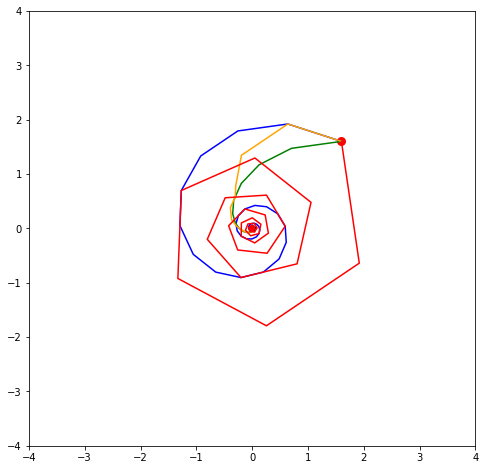

In [16]:
z0 = np.array([1.6,1.6])
gamma = 0.2
max_iters = 100
compare_all_methods(z0, gamma, max_iters)